In [132]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sns

import pickle

In [107]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 3)

In [108]:
data.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


# from the column we just need
- time
- amount
- fraud or not (class)

In [109]:
data.columns

Index(['Time', 'Amount', 'Class'], dtype='object')

In [110]:
df = data[['Time','Amount','Class']]
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [111]:
df.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [113]:
# check if missing Value
df.isna().any()

Time      False
Amount    False
Class     False
dtype: bool

In [114]:
# check the percentage of null values
pd.DataFrame({'Columns':df.isna().sum().index,'No. Null values':df.isna().sum().values,'Percentage':df.isna().sum().values/df.shape[0]})

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,Amount,0,0.0
2,Class,0,0.0


In [115]:
# fill the na is any null vlaues are there
df.fillna(method ='ffill', inplace = True)

In [116]:
# Percentage of total not_fraud transaction

not_fraud = sum([1 for tran in df['Class'] if tran == 0])/len(df['Class'])*100
print('percentage of not_fraud is :',not_fraud)

percentage of not_fraud is : 99.82725143693798


In [117]:
# Percentage of total fraud transaction

fraud = sum([1 for tran in df['Class'] if tran == 1])/len(df['Class'])*100
print('percentage of fraud is :',fraud)

percentage of fraud is : 0.1727485630620034


<AxesSubplot:title={'center':'Fraud vs genuine transactions'}, xlabel='Class', ylabel='count'>

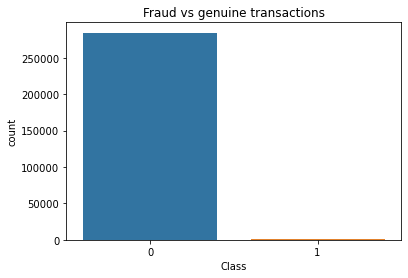

In [118]:
# Visualize data

plt.title('Fraud vs genuine transactions')
sns.countplot(x="Class", data=df)

Text(0.5, 1.0, 'Time Vs amount')

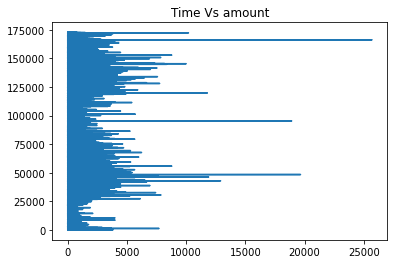

In [119]:
# The ratio of genuine transactions are higher than fraud transaction

plt.plot(df['Amount'],df['Time'])
plt.title('Time Vs amount')

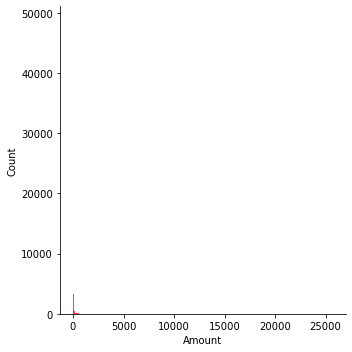

In [120]:
# distplot

sns.displot(df['Amount'],color='red')

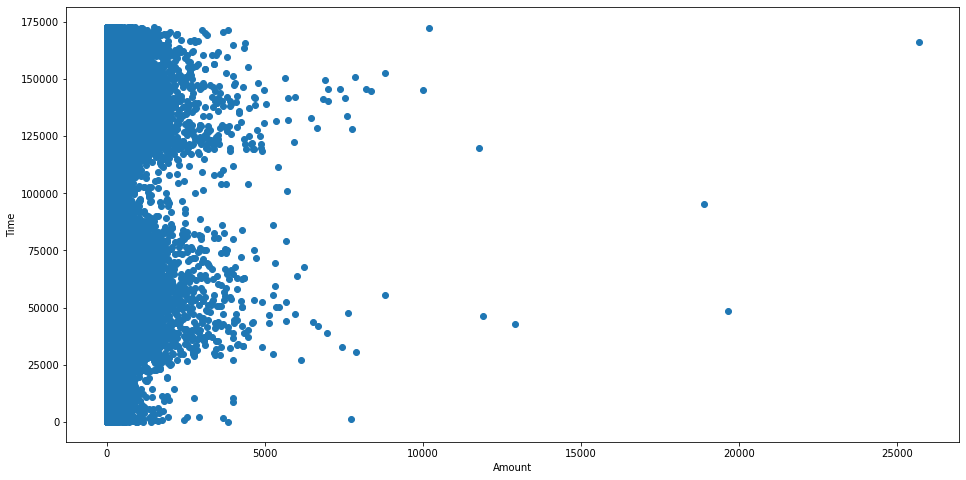

In [121]:
# scatter plot

fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Amount'],df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

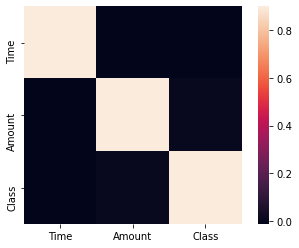

In [123]:
# Correlation matrix

correlation_matrics = df.corr()
sns.heatmap(correlation_matrics,square=True,vmax=.9)
plt.show()

In [129]:
# model

x = df.drop(['Class'],axis=1) # drop target variable
y= df['Class']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

model = LogisticRegression()
model.fit(xtrain,ytrain)


LogisticRegression()

In [130]:
y_pred = model.predict(xtest)

accuracy = model.score(xtest,ytest)
accuracy

0.9982795547909132

# Confusion Matrix
- Positive (P): Observation is positive (for example: The transaction genuine).
- Negative (N): Observation is not positive (for example:The transaction is not genuine).
- True Positive (TP) : Observation is positive, and is predicted to be positive.
- False Negative (FN) : Observation is positive, but is predicted negative.
- True Negative (TN) :Observation is negative, and is predicted to be negative.
- False Positive (FP): Observation is negative, but is predicted positive.

Accuracy = ( TP + TN ) / ( TP + TN + FP + FN ) 

In [128]:
cm = metrics.confusion_matrix(ytest,y_pred)
cm

array([[56864,     0],
       [   98,     0]], dtype=int64)

# Save Logistic Regression Model

In [134]:
pickle.dump(model, open('creditcard_model.sav', 'wb'))

In [135]:
# load the model from disk
loaded_model = pickle.load(open('creditcard_model.sav', 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.9982795547909132
